<a href="https://colab.research.google.com/github/gokulanv/ToyFederatedLearning/blob/master/TensorFlow/Baseline/Tensorflow_fashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

fmnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fmnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

4423680/4422102 [==============================] - 0s 0us/step


In [11]:
x_train.shape, x_test.shape

((1, 28, 28), (10000, 28, 28))

### Visualizing dataset

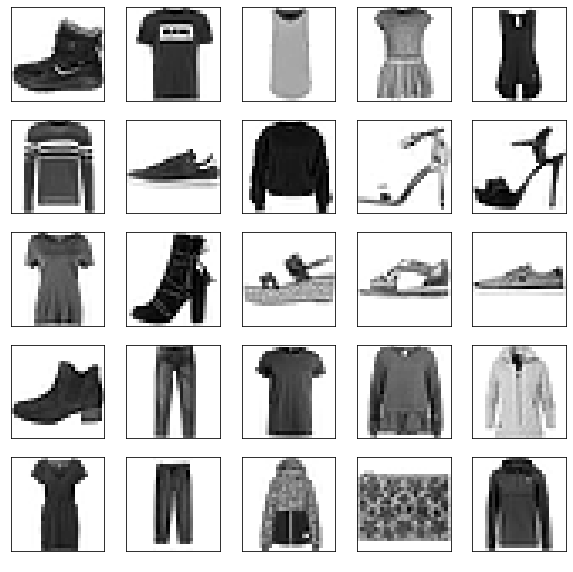

In [36]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
               
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]], color = 'white')
plt.show()

### Define Model

In [0]:
model = tf.keras.models.Sequential([
                        tf.keras.layers.Flatten(input_shape=(28,28)),
                        tf.keras.layers.Dense(128, activation='relu'),
                        tf.keras.layers.Dropout(0.2),
                        tf.keras.layers.Dense(64, activation='relu'),
                        tf.keras.layers.Dense(10)
        ])

In [28]:
preds = model(x_train[:1]).numpy()
preds

array([[ 0.77835745,  0.46990535,  0.47189286,  0.10278406,  1.1276171 ,
        -0.03970315, -0.5047188 , -0.28281182,  0.72776943,  0.13267267]],
      dtype=float32)

In [30]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], preds).numpy()

2.5825548

In [0]:
model.compile(optimizer='adam',
              loss = loss_fn,
              metrics=['accuracy'])

### Training

In [32]:
model.fit(x_train, y_train, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5311 - accuracy: 0.8082
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4033 - accuracy: 0.8524
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3717 - accuracy: 0.8651
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3506 - accuracy: 0.8706
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3348 - accuracy: 0.8752
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3239 - accuracy: 0.8791
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3129 - accuracy: 0.8842
Epoch 8/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3025 - accuracy: 0.8869
Epoch 9/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2962 - accuracy: 0.8904
Epoch 10/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.288

### Evaluation 
Accuracy = 89% (approx)

In [33]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.3279 - accuracy: 0.8896


[0.327908456325531, 0.8895999789237976]

### Visualizing prediction probabilities

In [0]:
probability_model = tf.keras.Sequential([model, 
                                        tf.keras.layers.Softmax()])

In [0]:
prob_predictions = probability_model.predict(x_test)

#### Helper functions to visualize images, probability distributions

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Visualizing prediction probabilies w.r.to test set

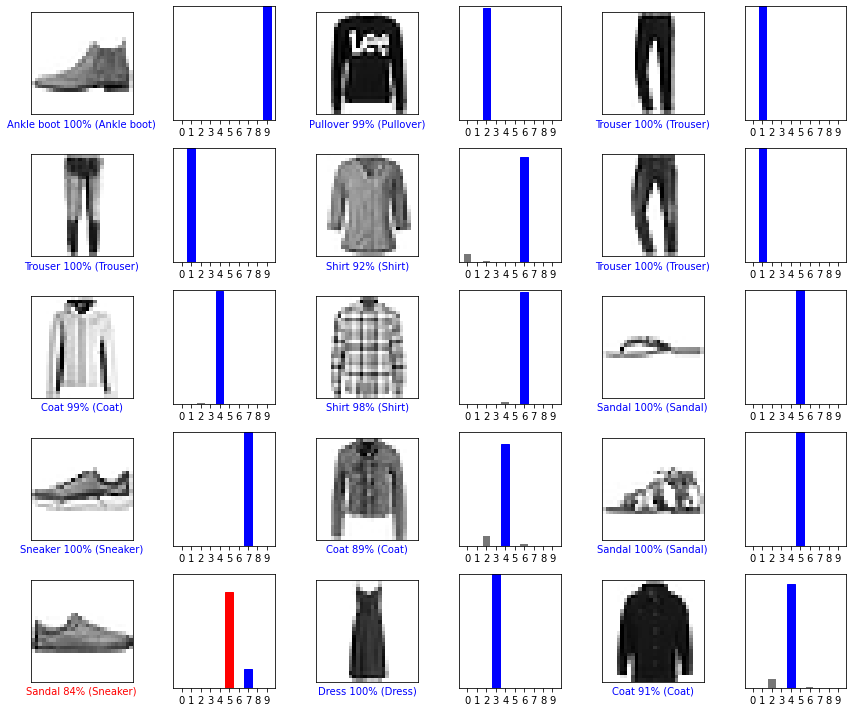

In [41]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prob_predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prob_predictions[i], y_test)
plt.tight_layout()
plt.show()

## With Convolutions:

#### Data preprocessing

In [0]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [0]:
cmodel = tf.keras.models.Sequential()
cmodel.add(tf.keras.layers.Conv2D(28, (3, 3), input_shape=input_shape))
cmodel.add(tf.keras.layers.MaxPooling2D((2, 2)))
cmodel.add(tf.keras.layers.Flatten())
cmodel.add(tf.keras.layers.Dense(128, activation='relu'))
cmodel.add(tf.keras.layers.Dropout(0.2))
cmodel.add(tf.keras.layers.Dense(64, activation='relu'))
cmodel.add(tf.keras.layers.Dense(10))

In [74]:
cmodel.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 4732)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               605824    
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_30 (Dense)             (None, 10)              

In [75]:
cmodel.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = cmodel.fit(x_train, y_train, epochs=30, 
                    validation_data=(x_test, y_test))

Epoch 1/30
1875/1875 [==============================] - 29s 16ms/step - loss: 0.4341 - accuracy: 0.8429 - val_loss: 0.3374 - val_accuracy: 0.8760
Epoch 2/30
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2979 - accuracy: 0.8915 - val_loss: 0.2880 - val_accuracy: 0.8934
Epoch 3/30
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2533 - accuracy: 0.9074 - val_loss: 0.2773 - val_accuracy: 0.9014
Epoch 4/30
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2219 - accuracy: 0.9174 - val_loss: 0.2809 - val_accuracy: 0.8970
Epoch 5/30
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2021 - accuracy: 0.9253 - val_loss: 0.2720 - val_accuracy: 0.9040
Epoch 6/30
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1811 - accuracy: 0.9331 - val_loss: 0.2601 - val_accuracy: 0.9078
Epoch 7/30
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1666 - accuracy: 0.9375 - val_loss: 0.2854 -

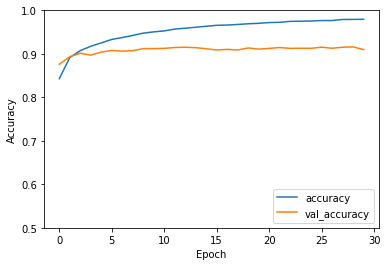

In [76]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

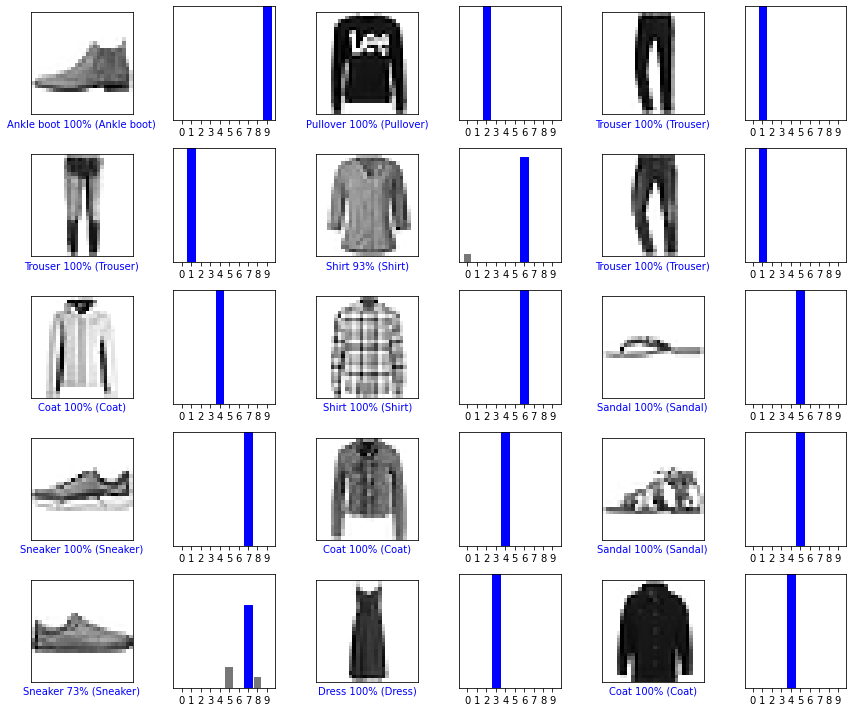

In [78]:
conv_probability_model = tf.keras.Sequential([cmodel, tf.keras.layers.Softmax()])
conv_prob_predictions = conv_probability_model.predict(x_test)
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, conv_prob_predictions[i], y_test, x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2]))
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, conv_prob_predictions[i], y_test)
plt.tight_layout()
plt.show()